<a href="https://colab.research.google.com/github/MagicYYe/NYU_Integrated_Marketing/blob/main/Final_Project_(zy2170).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

In [69]:
pip install pingouin

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/MagicYYe/NYU_Integrated_Marketing/main/CarPrice_Assignment.csv')
df=df.dropna()
df.head()

,car_ID,horsepower,price
0,1,111,13495.0
1,2,111,16500.0
2,3,154,16500.0
3,4,102,13950.0
4,5,115,17450.0


In [71]:
df.columns

Index(['car_ID', 'horsepower', 'price'], dtype='object')

Correlation

In [72]:
import pingouin as pg

In [86]:
pg.pairwise_corr(df,columns=['horsepower', 'price'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,horsepower,price,pearson,two-sided,205,0.808,"[0.75, 0.85]",0.653,0.65,1.122,0.0,1.432e+45,1.0


***Scatter Plot***

In [73]:
#install the package
import seaborn as sns

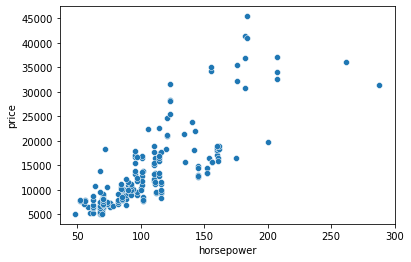

In [74]:
x='horsepower'
y='price'
sns.scatterplot(data=df, x=x, y=y)

Regression Reault

In [75]:
import statsmodels.api as sm

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_ID      205 non-null    int64  
 1   horsepower  205 non-null    int64  
 2   price       205 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.4 KB


In [77]:
X=df[['horsepower']]
y=df['price']

In [78]:
X= sm.add_constant(X)
X.head()

,const,horsepower
0,1.0,111
1,1.0,111
2,1.0,154
3,1.0,102
4,1.0,115


In [79]:
model = sm.OLS(y, X).fit()

In [80]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.48e-48
Time:                        15:41:20   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

Assumption Check

In [81]:
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-905.438273,14400.438273
1,2099.561727,14400.438273
2,-4920.749895,21420.749895
3,1018.929275,12931.070725
4,2396.509483,15053.490517


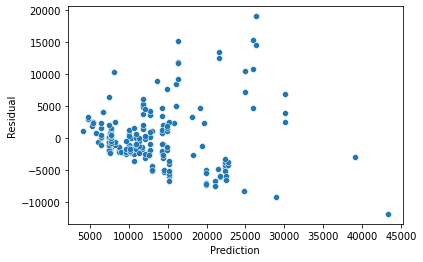

In [82]:
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

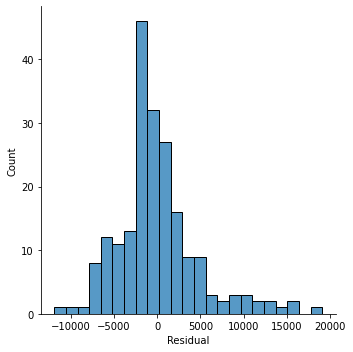

In [83]:
sns.displot(df_res, x="Residual")

In [84]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.921758,5.637171e-09,False


In [87]:
pg.pairwise_corr(df,columns=['horsepower','price'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,horsepower,price,pearson,two-sided,205,0.808,"[0.75, 0.85]",0.653,0.65,1.122,0.0,1.432e+45,1.0
